# Import Data

- convert the csv files into Pandas dataframes


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
os.chdir("./drive/MyDrive/DIVA_Project/data")

In [ ]:
!ls

combined.csv  games.csv  games_details.csv  players.csv  ranking.csv  results.csv  teams.csv


In [ ]:
games_df = pd.read_csv("games.csv")

In [ ]:
print(games_df.dtypes)
games_df.head()

In [ ]:
details_df = pd.read_csv("games_details.csv")

In [ ]:
print(details_df.dtypes)
details_df.head()

# Data Cleaning (Steps 1-6)

- Saved results of steps 1-6 in a new csv file ("combined.csv") in order to save space on Colab RAM

### Pseudocode for data cleaning



1.   Filter games.csv by game_id and season ✅
2.   Join filtered games.csv with games_details.csv (to be able to able to filter by season at any given point for a specific team) ✅
3. Group games.csv by game_id and player_id, and then calculate the total minutes played by each player in each game ✅
  - There's no need to calculate the total minutes because the dataset already gives the number of minutes of each player in each game
4. Perform a self-join on the dataframe to combine data of players who played in the same game ✅
5. For each pair of players, sum their minutes across all games to get the total minutes they played together ✅
6. Filter out pairs of the same player ✅
7. Group by player pairs and sum their minutes (do this for each player)✅
  - The resulting dataframe should allow us to query the sum (or avg) of minutes played for a particular team on a particular season

For example, for season 2022, the players for the San Antonio Spurs averaged x mins playing time together. We can also incorporate other metrics such as average plus/minus or fg percentage. This can be our parameters for a binary classification model (to keep it simple) and the label could be whether the team made the playoffs or not (don't think you can derive this from the current csv files however, so maybe win percentage can be calculated for a regression model).  

In [ ]:
# 1. Filter games.csv by game_id and season
filtered_games_df = games_df[['GAME_ID', 'SEASON']]

In [ ]:
filtered_games_df.head()

In [ ]:
# 2. Join filtered games.csv with games_details.csv (to be able to able to filter by season at any given point for a specific team)
filtered_season_df = pd.merge(filtered_games_df, details_df, on="GAME_ID", how="inner")
filtered_season_df = filtered_season_df[['GAME_ID', 'SEASON', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_ID', 'PLAYER_NAME', 'MIN']]

In [ ]:
filtered_season_df.head()

In [ ]:
# 3. Group games.csv by game_id and player_id, and then calculate the total minutes played by each player in each game
grouped_df = details_df.groupby(["GAME_ID", "PLAYER_ID"])

In [ ]:
grouped_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [ ]:
# 4. Perform a self-join on the dataframe to combine data of players who played in the same game
"""
grouped_df = grouped_df.to_frame()
grouped_df_copy = grouped_df
combined_df = pd.merge(grouped_df_copy, grouped_df, on="GAME_ID", how="inner")
"""

filter_copy = filtered_season_df[['GAME_ID', 'PLAYER_ID', 'PLAYER_NAME', 'MIN']]
combined_df = pd.merge(filter_copy, filtered_season_df, on="GAME_ID", how="inner")



In [ ]:
# Filter out pairs of the same player (#6)
combined_df = combined_df.loc[combined_df['PLAYER_ID_x'] != combined_df['PLAYER_ID_y']]
combined_df = combined_df.rename(columns={"PLAYER_ID_x": "PLAYER_ID_1", "PLAYER_NAME_x" : "PLAYER_NAME_1", "MIN_x": "MIN_1", "PLAYER_ID_y": "PLAYER_ID_2", "PLAYER_NAME_y": "PLAYER_NAME_2", "MIN_y": "MIN_2"})
combined_df = combined_df[['GAME_ID', 'SEASON', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_ID_1', 'PLAYER_NAME_1', 'MIN_1', 'PLAYER_ID_2', 'PLAYER_NAME_2', 'MIN_2']]


In [ ]:
df = combined_df
df.head()

In [ ]:
# 5. For each pair of players, sum their minutes across all games to get the total minutes they played together

df['MIN_1'] = df['MIN_1'].str.split(':')

In [ ]:
m, s = df['MIN_1'].str[0], df['MIN_1'].str[1]
m, s = m.astype(float), s.astype(float)
df['new_minutes_1'] = m + s/60

In [ ]:
df['MIN_1'] = df['new_minutes_1']

In [ ]:
df['MIN_2'] = df['MIN_2'].str.split(':')
m2, s2 = df['MIN_2'].str[0], df['MIN_2'].str[1]
m2, s2 = m2.astype(float), s2.astype(float)
df['new_minutes_2'] = m2 + s2/60

In [ ]:
df['MIN_2'] = df['new_minutes_2']

In [ ]:
df = df.drop(columns=['new_minutes_1', 'new_minutes_2'])

In [ ]:
df.head()

,GAME_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID_1,PLAYER_NAME_1,MIN_1,PLAYER_ID_2,PLAYER_NAME_2,MIN_2
1,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1631110,Jeremy Sochan,31.016667
2,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1627751,Jakob Poeltl,21.700000
3,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1630170,Devin Vassell,30.333333
4,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1630200,Tre Jones,27.733333
5,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1628380,Zach Collins,18.066667


In [ ]:
df.to_csv("combined.csv")

# Data Cleaning and EDA (Steps 7 and beyond)


In [ ]:
!ls

combined.csv  games.csv  games_details.csv  players.csv  ranking.csv  teams.csv


In [ ]:
combined_df = pd.read_csv("combined.csv")

In [ ]:
# 7. Group by player pairs and sum their minutes (do this for each player)

In [ ]:
combined_df['PlayerPair'] = combined_df[['PLAYER_NAME_1', 'PLAYER_NAME_2']].apply(lambda x: tuple(sorted(x)), axis=1)

In [ ]:
combined_df['TOTAL_MINUTES'] = combined_df['MIN_1'] + combined_df['MIN_2']

In [ ]:
combined_df.head()

,Unnamed: 0,GAME_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID_1,PLAYER_NAME_1,MIN_1,PLAYER_ID_2,PLAYER_NAME_2,MIN_2,TOTAL_MINUTES
0,1,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1631110,Jeremy Sochan,31.016667,49.116667
1,2,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1627751,Jakob Poeltl,21.700000,39.800000
2,3,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1630170,Devin Vassell,30.333333,48.433333
3,4,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1630200,Tre Jones,27.733333,45.833333
4,5,22200477,2022,1610612759,SAS,1629641,Romeo Langford,18.1,1628380,Zach Collins,18.066667,36.166667


In [ ]:
print(combined_df.dtypes)

Unnamed: 0             int64
GAME_ID                int64
SEASON                 int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_ID_1            int64
PLAYER_NAME_1         object
MIN_1                float64
PLAYER_ID_2            int64
PLAYER_NAME_2         object
MIN_2                float64
PlayerPair            object
TOTAL_MINUTES        float64
dtype: object


In [ ]:
combined_df = combined_df.dropna(subset=['TOTAL_MINUTES'])
combined_df['TOTAL_MINUTES'] = combined_df['TOTAL_MINUTES'].astype(float)

In [ ]:
grouped_pairs = combined_df.groupby('PlayerPair')['TOTAL_MINUTES'].sum().reset_index()

In [ ]:
grouped_pairs = combined_df.groupby(['PLAYER_NAME_1', 'PLAYER_NAME_2'])['TOTAL_MINUTES'].sum().reset_index()

In [ ]:
grouped_pairs = grouped_pairs.drop_duplicates(subset=['PlayerPair'])

In [ ]:
print(len(grouped_pairs))
grouped_pairs.iloc[500]
grouped_pairs.tail(1500)

1162687


,PLAYER_NAME_1,PLAYER_NAME_2,TOTAL_MINUTES
1161187,Zoran Planinic,Alvin Williams,79.783333
1161188,Zoran Planinic,Amal McCaskill,84.550000
1161189,Zoran Planinic,Amar'e Stoudemire,133.366667
1161190,Zoran Planinic,Anderson Varejao,66.350000
1161191,Zoran Planinic,Andray Blatche,24.533333
...,...,...,...
1162682,Zylan Cheatham,Willie Cauley-Stein,30.500000
1162683,Zylan Cheatham,Willy Hernangomez,87.383333
1162684,Zylan Cheatham,Zach Collins,27.550000
1162685,Zylan Cheatham,Zach LaVine,22.483333


In [ ]:
grouped_pairs.columns = ['Player1', 'Player2', 'TotalMinutes']

In [ ]:
games_seasons_df = combined_df.groupby(['PLAYER_NAME_1', 'PLAYER_NAME_2']).agg({'GAME_ID': 'nunique', 'SEASON': 'nunique'}).reset_index()
games_seasons_df.columns = ['Player1', 'Player2', 'GamesPlayedTogether', 'SeasonsPlayedTogether']

In [ ]:
games_seasons_df.head()

,Player1,Player2,GamesPlayedTogether,SeasonsPlayedTogether
0,A.J. Lawson,Admiral Schofield,1,1
1,A.J. Lawson,Anthony Davis,1,1
2,A.J. Lawson,Anthony Edwards,4,1
3,A.J. Lawson,Austin Reaves,2,1
4,A.J. Lawson,Austin Rivers,3,1


In [ ]:
result_df = pd.merge(games_seasons_df, grouped_pairs, on=['Player1', 'Player2'], how='left')

In [ ]:
result_df.to_csv("results.csv")

In [ ]:
df = pd.read_csv("results.csv")

### Playing around with the results dataframe


In [ ]:
df.head()

,Unnamed: 0,Player1,Player2,GamesPlayedTogether,SeasonsPlayedTogether,TotalMinutes
0,0,A.J. Lawson,Admiral Schofield,1,1,13.266667
1,1,A.J. Lawson,Anthony Davis,1,1,34.033333
2,2,A.J. Lawson,Anthony Edwards,4,1,134.566667
3,3,A.J. Lawson,Austin Reaves,2,1,62.800000
4,4,A.J. Lawson,Austin Rivers,3,1,73.633333


In [ ]:
df.loc[(df['Player1'] == 'Stephen Curry') & (df['Player2'] == 'Klay Thompson')]

,Unnamed: 0,Player1,Player2,GamesPlayedTogether,SeasonsPlayedTogether,TotalMinutes
1023629,1023629,Stephen Curry,Klay Thompson,730,10,49451.3


In [ ]:
df.loc[ (df['TotalMinutes'] > 3000) &  (df['SeasonsPlayedTogether'] < 3)]

,Unnamed: 0,Player1,Player2,GamesPlayedTogether,SeasonsPlayedTogether,TotalMinutes
1733,1733,Aaron Brooks,David Andersen,64,2,3162.816667
2497,2497,Aaron Brooks,Von Wafer,77,2,3491.766667
2678,2678,Aaron Gordon,Bones Hyland,93,2,4640.566667
2909,2909,Aaron Gordon,Facundo Campazzo,104,2,5274.350000
3686,3686,Aaron Gray,Andres Nocioni,105,2,3781.600000
...,...,...,...,...,...,...
1160646,1160646,Zion Williamson,JJ Redick,53,2,3239.750000
1160787,1160787,Zion Williamson,Lonzo Ball,80,2,5778.300000
1161536,1161536,Zoran Planinic,Nenad Krstic,96,2,3631.150000
1162173,1162173,Zydrunas Ilgauskas,Lucious Harris,74,2,3673.883333


In [ ]:
import seaborn as sns

<Axes: xlabel='TotalMinutes'>

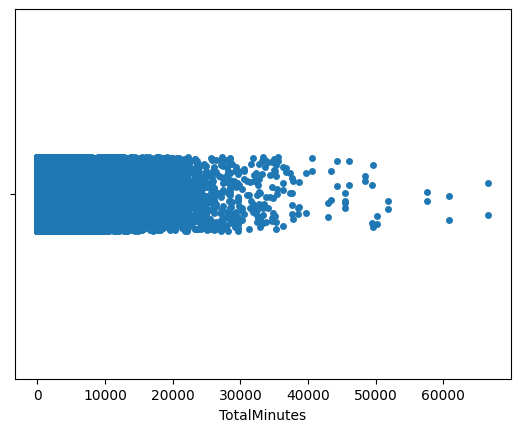

In [ ]:
sns.stripplot(x='TotalMinutes', data=df)